In [40]:
#import seaborn as sns
import pandas
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import numpy as np
warnings.filterwarnings('always')
filename = 'cat1.csv'
file = pandas.read_csv(filename,index_col=0)
print(file.shape)

(649, 38)


In [41]:
#x = file['spectrometric_redshift']

#dd=[]
#for classes in x:
 #   if (classes <= 0.0033):
  #      value=0
   # elif (classes >= 0.004):
    #    value=1    
    
    #dd.append(value)
#file['class'] = dd

#file.to_csv('correct.csv')

In [42]:
#data=pandas.read_csv('correct.csv')
#D=data.head()

In [43]:
#l =['pred','galex_objid','sdss_objid','Unnamed: 0','spectrometric_redshift','Unnamed: 0.1']
#l =['class','pred','galex_objid','sdss_objid','Unnamed: 0.1','spectrometric_redshift','extinction_u','extinction_g','extinction_r','extinction_i','extinction_z']
l =['class','pred','galex_objid','sdss_objid','extinction_u','extinction_g','extinction_r','extinction_i','extinction_z']
X = file.drop(l,axis=1)
#y =file['spectrometric_redshift']
y = file['class']
X.head()

,u,g,r,i,z,nuv_mag,fuv_mag,spectrometric_redshift,nuv-u,nuv-g,...,g-z,r-i,r-z,i-z,fuv-nuv,fuv-u,fuv-g,fuv-r,fuv-i,fuv-z
0,18.286291,16.968243,16.334318,16.039885,15.857203,20.535709,22.654970,0.001933,2.249418,3.567467,...,1.111040,0.294434,0.477116,0.182682,-2.119261,-4.368679,-5.686728,-6.320652,-6.615086,-6.797768
1,22.734962,21.516233,20.178501,19.238029,18.809675,22.594444,22.966053,2.097114,-0.140518,1.078211,...,2.706558,0.940472,1.368826,0.428354,-0.371609,-0.231091,-1.449820,-2.787552,-3.728024,-4.156378
2,21.223398,21.143623,21.149973,20.998989,21.145853,22.867874,24.001894,1.730619,1.644476,1.724251,...,-0.002230,0.150984,0.004120,-0.146864,-1.134020,-2.778496,-2.858271,-2.851921,-3.002905,-2.856041
3,21.771444,21.636995,21.564974,21.476393,21.266085,21.900541,22.846025,0.855979,0.129097,0.263546,...,0.370911,0.088581,0.298889,0.210308,-0.945484,-1.074581,-1.209030,-1.281052,-1.369633,-1.579941
4,22.767988,22.018591,21.658953,21.098751,20.734152,23.461775,24.284685,1.643224,0.693787,1.443184,...,1.284439,0.560202,0.924801,0.364599,-0.822910,-1.516697,-2.266094,-2.625732,-3.185934,-3.550533


In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,random_state=1)
X_train_spectrometric_redshift = X_train['spectrometric_redshift']
X_test_spectrometric_redshift = X_test['spectrometric_redshift']
#y_test_spectrometric_redshift=y_test['spectrometric_redshift']
#y_train_spectrometric_resdhift=  y_train['spectrometric_redshift']
X_test.shape

(130, 29)

In [45]:
X=X.drop('spectrometric_redshift',axis=1)
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf')
print(svclassifier.fit(X_train, y_train))

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [46]:
svclassifier = SVC(kernel='rbf')
#print((svclassifier.fit(X_train_spectrometric_redshift,y_train)))
svclassifier.fit(X_train_spectrometric_redshift.values.reshape(-1,1),y_train.values)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [51]:
y_pred1 = svclassifier.predict(X_test)
y_pred2 = svclassifier.predict(X_test_spectrometric_redshift.values.reshape(-1,1))
#print(y_pred1)
X_test.spectrometric_redshift.shape

ValueError: X.shape[1] = 29 should be equal to 1, the number of features at training time

In [50]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_pred1, y_pred2))
# print(classification_report(y_pred1, y_pred2))
print(y_pred1.shape , y_pred2.shape)

ValueError: Found input variables with inconsistent numbers of samples: [3770, 130]

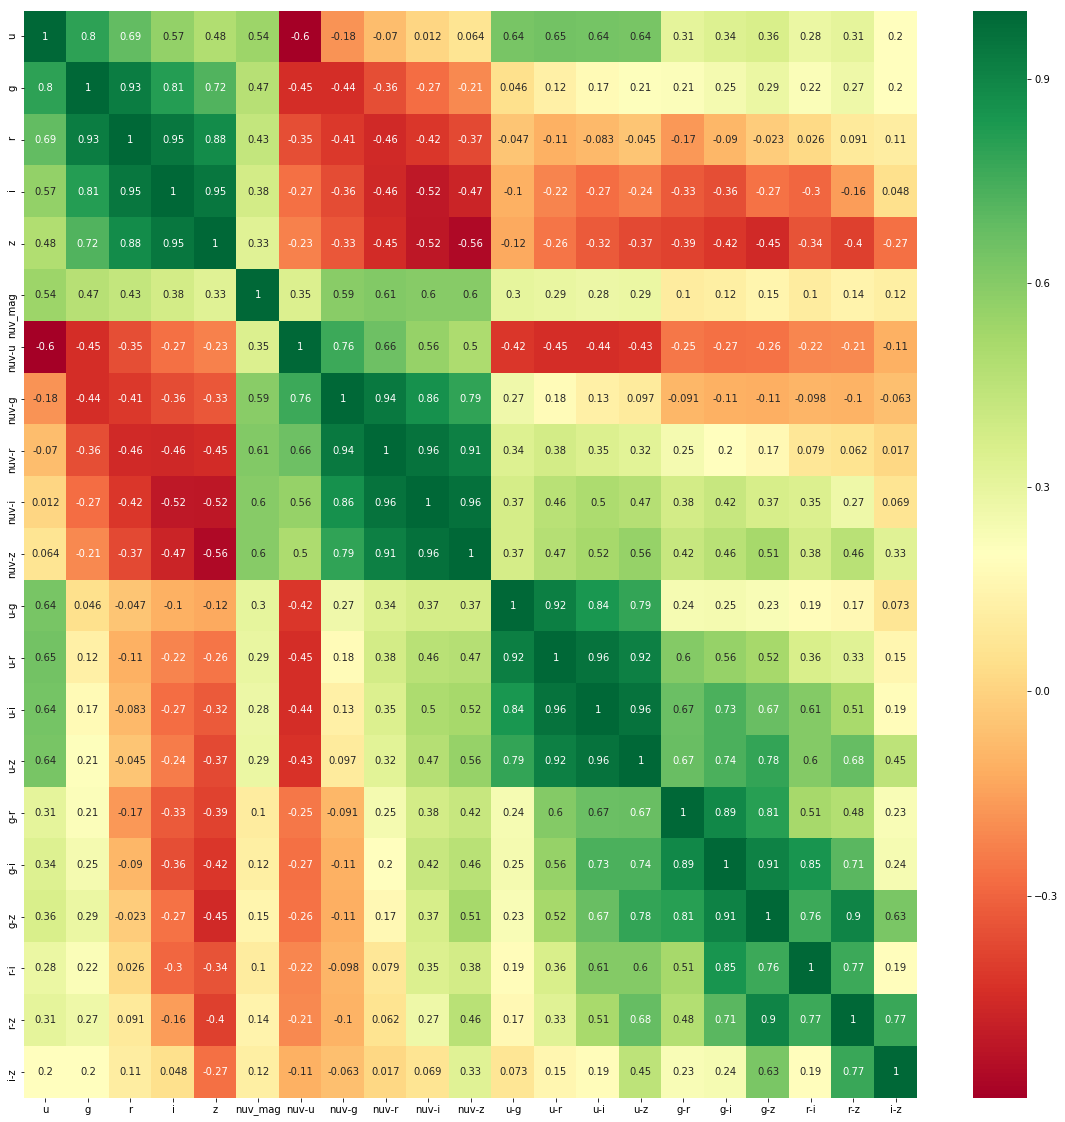

In [117]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = X.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(X[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [118]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33463 entries, 0 to 33462
Data columns (total 21 columns):
u          33463 non-null float64
g          33463 non-null float64
r          33463 non-null float64
i          33463 non-null float64
z          33463 non-null float64
nuv_mag    33463 non-null float64
nuv-u      33463 non-null float64
nuv-g      33463 non-null float64
nuv-r      33463 non-null float64
nuv-i      33463 non-null float64
nuv-z      33463 non-null float64
u-g        33463 non-null float64
u-r        33463 non-null float64
u-i        33463 non-null float64
u-z        33463 non-null float64
g-r        33463 non-null float64
g-i        33463 non-null float64
g-z        33463 non-null float64
r-i        33463 non-null float64
r-z        33463 non-null float64
i-z        33463 non-null float64
dtypes: float64(21)
memory usage: 5.6 MB


In [119]:
from sklearn.grid_search import GridSearchCV

In [120]:
param_grid={'C':[0.1,1,10,100,1000],'gamma':[0.1,1,0.01,0.001,0.0001]}

In [121]:
grid=GridSearchCV(SVC(),param_grid,verbose=0)

In [ ]:
grid.fit(X_train,y_train)

In [ ]:
grid.best_params_

In [ ]:
grid.best_estimator_


In [ ]:
grid_predictions=grid.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))
print("\n")
print(classification_report(y_test,grid_predictions))